# Linear Algebra Concepts

Resources: <br/>
The matrix cookbook (petersen and pedersen 2006) <br/>
Shilov (1977)

## Scalars, vectors, matrices

In [1]:
import torch

In [2]:
scalar = torch.tensor(2)

In [3]:
scalar

tensor(2)

In [4]:
vector = torch.tensor([1,2,3])

In [5]:
vector

tensor([1, 2, 3])

In [6]:
matrix = torch.tensor([[1,2,3],[4,5,6]])

In [7]:
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [8]:
tensors = torch.arange(45).view(-1,3,5)

In [9]:
tensors

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]],

        [[15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44]]])

## Operations on matrix

In [10]:
matrix.T, matrix # Tranpose a matrx

(tensor([[1, 4],
         [2, 5],
         [3, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [11]:
matrix.mm(matrix.T) # Matrix multiplications

tensor([[14, 32],
        [32, 77]])

In [12]:
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [13]:
matrix + torch.tensor([[1,2,3]]) #Sum broadcasting

tensor([[2, 4, 6],
        [5, 7, 9]])

In [14]:
matrix + torch.tensor([[1],[2]]) # Sum broadcasting

tensor([[2, 3, 4],
        [6, 7, 8]])

In [15]:
torch.tensor([[1,2,3]])**torch.tensor([1,2,3])

tensor([[ 1,  4, 27]])

In [16]:
torch.eye(3) # Identity matrix

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Inverse matrix

In [17]:
matrix = torch.eye(3, dtype=torch.float)*3
matrix

tensor([[3., 0., 0.],
        [0., 3., 0.],
        [0., 0., 3.]])

In [18]:
torch.inverse(matrix)

tensor([[0.3333, 0.0000, -0.0000],
        [0.0000, 0.3333, -0.0000],
        [0.0000, 0.0000, 0.3333]])

In [19]:
torch.inverse(matrix).mm(matrix)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Norm

$$L_p -> ||x|| = (\sum_i |x_i|^p)^\frac{1}{p}$$

In [20]:
torch.norm(torch.arange(10, dtype=torch.float), p=float('inf'))

tensor(9.)

In [21]:
torch.norm(torch.arange(10, dtype=torch.float).view(5,2), p='fro') # Frobenious Norm

tensor(16.8819)

In [22]:
x = torch.arange(10, dtype=torch.float)*2+3
y = torch.arange(10, dtype=torch.float)*1/2+1

In [23]:
x.dot(y)

tensor(472.5000)

## Special Kind of matrices

### Diagonal matrices

In [24]:
# Diagonal matrices
torch.diag(torch.tensor([10.0, 4.0]))

tensor([[10.,  0.],
        [ 0.,  4.]])

In [25]:
torch.diag(torch.arange(4) + 1).mv(torch.tensor([1,2,3,4]))

tensor([ 1,  4,  9, 16])

In [26]:
torch.diag(torch.arange(4) + 1)

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])

In [27]:
torch.inverse(torch.diag(torch.arange(4, dtype=torch.float) + 1))

tensor([[1.0000, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.5000, 0.0000, -0.0000],
        [0.0000, 0.0000, 0.3333, -0.0000],
        [0.0000, 0.0000, 0.0000, 0.2500]])

In [28]:
# Rectangular diagonal matrices
diag = torch.diag(torch.arange(4) + 1)

In [29]:
diag

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]])

In [30]:
rectdiag = torch.cat((diag, torch.zeros((1,4), dtype=torch.long)), dim=0)

In [31]:
rectdiag

tensor([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4],
        [0, 0, 0, 0]])

In [32]:
rectdiag.mv(torch.arange(4)+1), torch.arange(4) + 1

(tensor([ 1,  4,  9, 16,  0]), tensor([1, 2, 3, 4]))

In [33]:
rectdiag = torch.cat((diag, torch.zeros((4,1), dtype=torch.long)), dim=1)

In [34]:
rectdiag, torch.arange(5) + 1

(tensor([[1, 0, 0, 0, 0],
         [0, 2, 0, 0, 0],
         [0, 0, 3, 0, 0],
         [0, 0, 0, 4, 0]]),
 tensor([1, 2, 3, 4, 5]))

In [35]:
rectdiag.mv(torch.arange(5)+1)

tensor([ 1,  4,  9, 16])

### Symmetric matrices

In [36]:
A = torch.diag(torch.arange(4) + 1)

In [37]:
A == A.T

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Unit Vector

In [38]:
x = torch.arange(4, dtype=torch.float) + 1
x_u = x/x.norm()
x_u.norm(), x_u

(tensor(1.0000), tensor([0.1826, 0.3651, 0.5477, 0.7303]))

### Eigen descomposition

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
matrix = torch.eye(2, dtype=torch.float)*3

In [41]:
torch.eig(matrix, eigenvectors=True)

torch.return_types.eig(
eigenvalues=tensor([[3., 0.],
        [3., 0.]]),
eigenvectors=tensor([[1., 0.],
        [0., 1.]]))

In [42]:
eigen_matrix = torch.eig(matrix, eigenvectors=True).eigenvectors
eigen_matrix

tensor([[1., 0.],
        [0., 1.]])

In [43]:
matrix.mv(torch.tensor([1,0.0])) == 3*torch.tensor([1,0.0]) # Eigen vector of matrix

tensor([True, True])

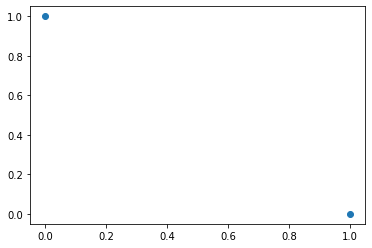

In [44]:
plt.scatter(eigen_matrix[:,0], eigen_matrix[:,1])
plt.show()

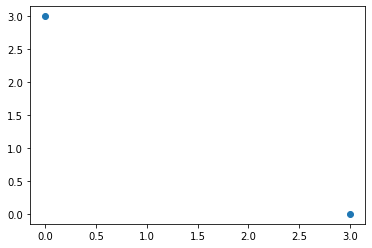

In [45]:
plt.scatter(matrix.mv(eigen_matrix[:,0]), matrix.mv(eigen_matrix[:,1]))
plt.show()

In [46]:
eigen_matrix.mm(torch.diag(torch.tensor([3.0,3]))).mm(eigen_matrix.T) == matrix

tensor([[True, True],
        [True, True]])

In [47]:
torch.svd(matrix) # Eigenvalue decomposition < generalize singular value decomposition

torch.return_types.svd(
U=tensor([[1., 0.],
        [0., 1.]]),
S=tensor([3., 3.]),
V=tensor([[1., 0.],
        [0., 1.]]))

In [48]:
matrix = torch.arange(10, dtype=torch.float).view(2,-1)
U, S, V = torch.svd(matrix)

In [49]:
U.shape, torch.diag(S).shape, V.shape

(torch.Size([2, 2]), torch.Size([2, 2]), torch.Size([5, 2]))

## The moon penrose pseudo inverse

$$A^{+} = \lim_{\alpha -> 0}(A^{T}A + \alpha I)^{-1}A^{T}$$

Algorithms that calculate the pseudo inverse does not use the previous definition, but the following formulae instead:

Given the svd for a matrix $A$, $A = UDV^{T}$
$$A^{+} = VD^{+}U^{T}$$

In [50]:
A = (torch.arange(10, dtype=torch.float) + 1).reshape(5, 2)

In [51]:
U, S, V = torch.svd(A) # using the sigular value descomposition

In [52]:
D = torch.diag(S)

In [53]:
def get_D_plus(D):
    D_plus = (1/D).T
    D_plus[D_plus == float('inf')] = 0
    return D_plus

In [54]:
D_plus = get_D_plus(D)

In [55]:
A_plus = V.mm(D_plus).mm(U.T)

In [56]:
torch.pinverse(A)

tensor([[-0.8000, -0.5000, -0.2000,  0.1000,  0.4000],
        [ 0.7000,  0.4500,  0.2000, -0.0500, -0.3000]])

In [57]:
A_plus

tensor([[-0.8000, -0.5000, -0.2000,  0.1000,  0.4000],
        [ 0.7000,  0.4500,  0.2000, -0.0500, -0.3000]])

## the trace operator

the trace operators give the sum of all the diagonal entries of a matrix $A$:

$$Tr(A) = \sum_i A_{i,i}$$

In [58]:
torch.trace(A), torch.diag(A).sum()

(tensor(5.), tensor(5.))

### Frobenious norm using trace operator

In [59]:
torch.trace(A.mm(A.T)).sqrt(), A.norm(p='fro')

(tensor(19.6214), tensor(19.6214))

## The determinant

The determinant of matrix denoted $det(A)$ is a function that mapping matrices to real scalars. The determinant is equal to the product of all the eigenvalues of the matrix. The absolute value of the determinant can be thought of as a measure of how much multiplication byt the matrix expands or contracts the space. If the determinant is zero, the space is contracted completely along at least one dimension, causing to lose all its volumne. If the determinant is 1 then the transformation preserve its volume.

In [60]:
torch.det((torch.arange(4, dtype=torch.float) + 1).view(2,2))

tensor(-2.0000)

## Principal Component Analysis Algorithm


In [61]:
lr = 0.0001
X = torch.arange(15, dtype=torch.float).view(-1, 3) 
m, n = X.shape
l = 2

# Matrix code, reconstruction and decode
D = torch.randn((n, l), requires_grad=True)
loss_min = float('inf')

losses = []
for it in range(10000):
    # Solve this 
    diff = X - (X.mm(D)).mm(D.T)
    loss = torch.norm(diff, p='fro')
    loss.backward()
    if it%100 == 0:
        print("it: %i loss: %f" %(it, loss.item()))
    # Append loss
    losses.append(loss.item())
    with torch.no_grad():
        if loss < loss_min:
            loss_min = loss.item()
            best_D = D.clone()
        D -= lr*D.grad
        D.grad.zero_()
D = best_D

it: 0 loss: 52.191322
it: 100 loss: 7.090342
it: 200 loss: 1.779589
it: 300 loss: 1.672842
it: 400 loss: 1.582076
it: 500 loss: 1.500197
it: 600 loss: 1.426459
it: 700 loss: 1.360116
it: 800 loss: 1.300429
it: 900 loss: 1.246681
it: 1000 loss: 1.198179
it: 1100 loss: 1.154270
it: 1200 loss: 1.114342
it: 1300 loss: 1.077834
it: 1400 loss: 1.044237
it: 1500 loss: 1.013093
it: 1600 loss: 0.984000
it: 1700 loss: 0.956599
it: 1800 loss: 0.930582
it: 1900 loss: 0.905681
it: 2000 loss: 0.881666
it: 2100 loss: 0.858339
it: 2200 loss: 0.835530
it: 2300 loss: 0.813097
it: 2400 loss: 0.790920
it: 2500 loss: 0.768897
it: 2600 loss: 0.746942
it: 2700 loss: 0.724982
it: 2800 loss: 0.702961
it: 2900 loss: 0.680829
it: 3000 loss: 0.658546
it: 3100 loss: 0.636082
it: 3200 loss: 0.613412
it: 3300 loss: 0.590518
it: 3400 loss: 0.567385
it: 3500 loss: 0.544006
it: 3600 loss: 0.520375
it: 3700 loss: 0.496492
it: 3800 loss: 0.472358
it: 3900 loss: 0.447977
it: 4000 loss: 0.423358
it: 4100 loss: 0.398507
it:

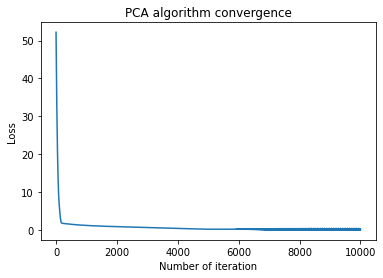

In [62]:
plt.plot(losses)
plt.title('PCA algorithm convergence')
plt.ylabel('Loss')
plt.xlabel('Number of iteration')
plt.show()

### This matrix is our decode and encode matrix

In [63]:
X_code = X.mm(D)
print("X_code:\n", X_code) # X code to R^2 
print("Original_X:\n", X) # Original X
X_recons = (X.mm(D)).mm(D.T)
print("X_recons:\n",X_recons)

X_code:
 tensor([[ -2.2341,  -0.1006],
        [ -6.1086,  -3.5653],
        [ -9.9831,  -7.0300],
        [-13.8577, -10.4948],
        [-17.7322, -13.9595]])
Original_X:
 tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])
X_recons:
 tensor([[6.7792e-04, 1.0005e+00, 2.0003e+00],
        [3.0029e+00, 4.0023e+00, 5.0017e+00],
        [6.0052e+00, 7.0041e+00, 8.0031e+00],
        [9.0075e+00, 1.0006e+01, 1.1004e+01],
        [1.2010e+01, 1.3008e+01, 1.4006e+01]])


### PCA using singular value decomposition

We can show that the best value of D are the eigenvalue decomposition for $X^{T}X$, let's see an example of this without using gradient descent

In [64]:
U, S, _ = torch.svd(X.T.mm(X))

In [65]:
U.shape, S.shape

(torch.Size([3, 3]), torch.Size([3]))

In [66]:
U.mm(torch.diag(S)).mm(U.T)

tensor([[269.9999, 299.9999, 329.9999],
        [299.9999, 335.0000, 370.0000],
        [329.9999, 370.0000, 410.0000]])

In [67]:
X.T.mm(X)

tensor([[270., 300., 330.],
        [300., 335., 370.],
        [330., 370., 410.]])

In [71]:
torch.diag(U.T.mm(X.T.mm(X)).mm(U))

tensor([1.0123e+03, 2.6671e+00, 9.1518e-11])

In [72]:
S

tensor([1.0123e+03, 2.6671e+00, 7.5923e-07])

In [73]:
X

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])

In [74]:
U[:,:1].T.mm(X.T).mm(X).mm(U[:,:1])

tensor([[1012.3326]])

In [75]:
X_code = X.mm(U[:,:2])
print("X_code:\n", X_code) # X code to R^2 
print("Original_X:\n", X) # Original X
X_recons = X_code.mm(U[:,:2].T)
print("X_recons:\n",X_recons)

X_code:
 tensor([[ -1.8463,  -1.2615],
        [ -7.0235,  -0.8186],
        [-12.2008,  -0.3758],
        [-17.3780,   0.0670],
        [-22.5553,   0.5098]])
Original_X:
 tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])
X_recons:
 tensor([[-3.6359e-06,  1.0000e+00,  2.0000e+00],
        [ 3.0000e+00,  4.0000e+00,  5.0000e+00],
        [ 6.0000e+00,  7.0000e+00,  8.0000e+00],
        [ 9.0000e+00,  1.0000e+01,  1.1000e+01],
        [ 1.2000e+01,  1.3000e+01,  1.4000e+01]])
